/opt/conda/lib/python3.7/site-packages/pyroomacoustics/room.py:1269: UserWarning: Using absorption parameter is deprecated. In the future, use materials instead.
  "Using absorption parameter is deprecated. In the future, use materials instead."


The measured RT60 is 0.33599999999999997


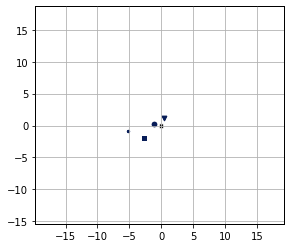

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
from scipy.io import wavfile

#=========================================================================================
# 音檔位置生成
def get_voice_position(x):
    voice_radius = np.random.uniform(low=1.0, high=6.0)
    voice_theta = np.random.uniform(low=0, high=2 * np.pi)
    voice_loc = [
        voice_radius * np.cos(voice_theta),
        voice_radius * np.sin(voice_theta)
    ]
    return voice_loc
#=========================================================================================
# 創建房間
left_wall = np.random.uniform(low=-20, high=-15)
right_wall = np.random.uniform(low=15, high=20)
top_wall = np.random.uniform(low=15, high=20)
bottom_wall = np.random.uniform(low=-20, high=-15)
absorption = np.random.uniform(low=0.1, high=0.99)

corners = np.array([[left_wall, bottom_wall], [left_wall, top_wall],
                    [   right_wall, top_wall], [right_wall, bottom_wall]]).T

room = pra.Room.from_corners(corners,
        fs=16000,
        max_order=10,
        absorption=absorption)
#=========================================================================================
# 音檔讀取
fs, audio1 = wavfile.read("./samples/1.wav")
fs, audio2 = wavfile.read("./samples/2.wav")
fs, audio3 = wavfile.read("./samples/3.wav")
fs, audio4 = wavfile.read("./samples/4.wav")
#=========================================================================================
# 音檔輸入
room.add_source(get_voice_position(1), signal=audio1)
room.add_source(get_voice_position(2), signal=audio2)
room.add_source(get_voice_position(3), signal=audio3)
room.add_source(get_voice_position(4), signal=audio4)
#=========================================================================================
# 創建麥克風
R = pra.circular_2D_array(center=[0., 0.], M=4, phi0=0, radius=.03231)
room.add_microphone_array(pra.MicrophoneArray(R, 16000))

room.simulate()
#=========================================================================================
# 存檔的位置
room.mic_array.to_wav(
    f"/workspace/Cone-of-Silence/test.wav",
    norm=True,
    bitdepth=np.int16,
)
#=========================================================================================
# 評量方式
rt60 = room.measure_rt60()
print("The measured RT60 is {}".format(rt60[1, 0]))
#=========================================================================================
# 畫出房間的圖
fig, ax = room.plot()
plt.grid()
plt.show()